**Here I document the steps taken towards seggregating training, testing and unseen voice data.**

# Setting up the path

In [0]:
import os
import shutil
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
pd.set_option('max_colwidth', -1)

In [0]:
import cv2

In [2]:
%cd /content/drive/My Drive/case studies 2

/content/drive/My Drive/case studies 2


In [3]:
%cd mel_spectrograms/

/content/drive/My Drive/case studies 2/mel_spectrograms


In [4]:
!ls

final_data	 Training_Images_2  Validation_Images
Training_Images  Training_Images_3


In [5]:
%cd final_data/

/content/drive/My Drive/case studies 2/mel_spectrograms/final_data


In [6]:
!ls

testing_data.csv  training_data.csv


In [0]:
df_1 = pd.read_csv('training_data.csv')

In [10]:
df_1.head()

,Unnamed: 0,images,image_name,label
0,0,/content/drive/My Drive/case studies 2/mel_spectrograms/Training_Images_2/909- 3 -1148.jpg,909- 3 -1148.jpg,909
1,1,/content/drive/My Drive/case studies 2/mel_spectrograms/Training_Images_2/909- 10 -1127.jpg,909- 10 -1127.jpg,909
2,2,/content/drive/My Drive/case studies 2/mel_spectrograms/Training_Images_2/909- 10 -1129.jpg,909- 10 -1129.jpg,909
3,3,/content/drive/My Drive/case studies 2/mel_spectrograms/Training_Images_2/909- 10 -1131.jpg,909- 10 -1131.jpg,909
4,4,/content/drive/My Drive/case studies 2/mel_spectrograms/Training_Images_2/909- 10 -1132.jpg,909- 10 -1132.jpg,909


In [11]:
len(df_1)

42500

In [12]:
df_1['label'].nunique()

170

In [0]:
df_2 = pd.read_csv('testing_data.csv')

In [14]:
len(df_2)

10370

In [15]:
df_2.head()

,Unnamed: 0,images,image_name,label
0,0,/content/drive/My Drive/case studies 2/mel_spectrograms/Validation_Images/909- 15 -1144.jpg,909- 15 -1144.jpg,909
1,1,/content/drive/My Drive/case studies 2/mel_spectrograms/Training_Images_2/909- 3 -1147.jpg,909- 3 -1147.jpg,909
2,2,/content/drive/My Drive/case studies 2/mel_spectrograms/Validation_Images/909- 13 -1142.jpg,909- 13 -1142.jpg,909
3,3,/content/drive/My Drive/case studies 2/mel_spectrograms/Validation_Images/909- 13 -1141.jpg,909- 13 -1141.jpg,909
4,4,/content/drive/My Drive/case studies 2/mel_spectrograms/Validation_Images/909- 13 -1139.jpg,909- 13 -1139.jpg,909


In [16]:
df_2['label'].nunique()

170

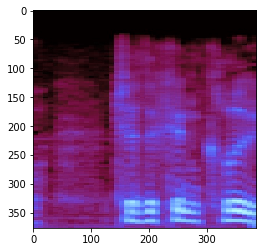

In [18]:
plt.imshow(cv2.imread(df_2['images'][0]))

In [19]:
images = []
label = []
for i in df_1['images']:
  images.append(i)
for i in df_2['images']:
  images.append(i)
for i in df_1['label']:
  label.append(i)
for i in df_2['label']:
  label.append(i)
print(len(images))
print(len(label))

52870
52870


In [21]:
combined_df = pd.DataFrame(columns = ['images', 'labels'])
combined_df['images'] = images
combined_df['label'] = label
combined_df.shape

(52870, 3)

In [22]:
combined_df.head()

,images,labels,label
0,/content/drive/My Drive/case studies 2/mel_spectrograms/Training_Images_2/909- 3 -1148.jpg,NaN,909
1,/content/drive/My Drive/case studies 2/mel_spectrograms/Training_Images_2/909- 10 -1127.jpg,NaN,909
2,/content/drive/My Drive/case studies 2/mel_spectrograms/Training_Images_2/909- 10 -1129.jpg,NaN,909
3,/content/drive/My Drive/case studies 2/mel_spectrograms/Training_Images_2/909- 10 -1131.jpg,NaN,909
4,/content/drive/My Drive/case studies 2/mel_spectrograms/Training_Images_2/909- 10 -1132.jpg,NaN,909


In [0]:
del combined_df['labels']

In [24]:
combined_df.head()

,images,label
0,/content/drive/My Drive/case studies 2/mel_spectrograms/Training_Images_2/909- 3 -1148.jpg,909
1,/content/drive/My Drive/case studies 2/mel_spectrograms/Training_Images_2/909- 10 -1127.jpg,909
2,/content/drive/My Drive/case studies 2/mel_spectrograms/Training_Images_2/909- 10 -1129.jpg,909
3,/content/drive/My Drive/case studies 2/mel_spectrograms/Training_Images_2/909- 10 -1131.jpg,909
4,/content/drive/My Drive/case studies 2/mel_spectrograms/Training_Images_2/909- 10 -1132.jpg,909


In [25]:
!pwd

/content/drive/My Drive/case studies 2/mel_spectrograms/final_data


In [26]:
%cd ..

/content/drive/My Drive/case studies 2/mel_spectrograms


In [27]:
!pwd

/content/drive/My Drive/case studies 2/mel_spectrograms


In [28]:
%cd ..

/content/drive/My Drive/case studies 2


In [29]:
%cd Final_Data/

/content/drive/My Drive/case studies 2/Final_Data


In [30]:
!ls

 Final_Face_Data  'Final Face Data Creation.ipynb'   Untitled0.ipynb


In [0]:
os.mkdir('Final_Voice_Data')

In [32]:
%cd Final_Voice_Data/

/content/drive/My Drive/case studies 2/Final_Data/Final_Voice_Data


In [0]:
os.mkdir('combined_voices_data')

In [34]:
%cd combined_voices_data/

/content/drive/My Drive/case studies 2/Final_Data/Final_Voice_Data/combined_voices_data


In [0]:
combined_df.to_csv('combined_data.csv')

In [36]:
%cd ..

/content/drive/My Drive/case studies 2/Final_Data/Final_Voice_Data


In [0]:
os.mkdir('data_for_experiments')
os.mkdir('training_data')
os.mkdir('test_data')
os.mkdir('unseen_data')

# Data Creation for the Experiments

In [38]:
%cd data_for_experiments/

/content/drive/My Drive/case studies 2/Final_Data/Final_Voice_Data/data_for_experiments


In [39]:
combined_df.head()

,images,label
0,/content/drive/My Drive/case studies 2/mel_spectrograms/Training_Images_2/909- 3 -1148.jpg,909
1,/content/drive/My Drive/case studies 2/mel_spectrograms/Training_Images_2/909- 10 -1127.jpg,909
2,/content/drive/My Drive/case studies 2/mel_spectrograms/Training_Images_2/909- 10 -1129.jpg,909
3,/content/drive/My Drive/case studies 2/mel_spectrograms/Training_Images_2/909- 10 -1131.jpg,909
4,/content/drive/My Drive/case studies 2/mel_spectrograms/Training_Images_2/909- 10 -1132.jpg,909


In [0]:
unique_labels = list(combined_df['label'].unique())

In [42]:
len(unique_labels)

170

In [0]:
final_labels = unique_labels[:160]

In [44]:
len(final_labels)

160

In [45]:
present = []
for i in combined_df['label']:
  if i in final_labels:
    present.append('yes')
  else:
    present.append('no')
len(present)

52870

In [46]:
combined_df['present'] = present
combined_df.head()

,images,label,present
0,/content/drive/My Drive/case studies 2/mel_spectrograms/Training_Images_2/909- 3 -1148.jpg,909,yes
1,/content/drive/My Drive/case studies 2/mel_spectrograms/Training_Images_2/909- 10 -1127.jpg,909,yes
2,/content/drive/My Drive/case studies 2/mel_spectrograms/Training_Images_2/909- 10 -1129.jpg,909,yes
3,/content/drive/My Drive/case studies 2/mel_spectrograms/Training_Images_2/909- 10 -1131.jpg,909,yes
4,/content/drive/My Drive/case studies 2/mel_spectrograms/Training_Images_2/909- 10 -1132.jpg,909,yes


In [0]:
experimental_df = combined_df.loc[combined_df['present'] == 'yes']

In [51]:
len(experimental_df)

49760

In [52]:
experimental_df.head()

,images,label,present
0,/content/drive/My Drive/case studies 2/mel_spectrograms/Training_Images_2/909- 3 -1148.jpg,909,yes
1,/content/drive/My Drive/case studies 2/mel_spectrograms/Training_Images_2/909- 10 -1127.jpg,909,yes
2,/content/drive/My Drive/case studies 2/mel_spectrograms/Training_Images_2/909- 10 -1129.jpg,909,yes
3,/content/drive/My Drive/case studies 2/mel_spectrograms/Training_Images_2/909- 10 -1131.jpg,909,yes
4,/content/drive/My Drive/case studies 2/mel_spectrograms/Training_Images_2/909- 10 -1132.jpg,909,yes


In [53]:
del experimental_df['present']
experimental_df.head()

,images,label
0,/content/drive/My Drive/case studies 2/mel_spectrograms/Training_Images_2/909- 3 -1148.jpg,909
1,/content/drive/My Drive/case studies 2/mel_spectrograms/Training_Images_2/909- 10 -1127.jpg,909
2,/content/drive/My Drive/case studies 2/mel_spectrograms/Training_Images_2/909- 10 -1129.jpg,909
3,/content/drive/My Drive/case studies 2/mel_spectrograms/Training_Images_2/909- 10 -1131.jpg,909
4,/content/drive/My Drive/case studies 2/mel_spectrograms/Training_Images_2/909- 10 -1132.jpg,909


In [54]:
experimental_df['label'].nunique()

160

In [55]:
experimental_df['label'].value_counts(dropna = False)

1919    311
5789    311
3947    311
3915    311
3723    311
       ... 
1650    311
7697    311
5456    311
5104    311
32      311
Name: label, Length: 160, dtype: int64

In [60]:
experimental_df = experimental_df.sort_values('label', ascending = False).groupby('label').head(260)
experimental_df = experimental_df.reset_index(drop = True)
experimental_df.head()

,images,label
0,/content/drive/My Drive/case studies 2/mel_spectrograms/Training_Images_2/8975- 10 -1008.jpg,8975
1,/content/drive/My Drive/case studies 2/mel_spectrograms/Training_Images_2/8975- 5 -1040.jpg,8975
2,/content/drive/My Drive/case studies 2/mel_spectrograms/Training_Images_2/8975- 5 -1002.jpg,8975
3,/content/drive/My Drive/case studies 2/mel_spectrograms/Training_Images_2/8975- 5 -1003.jpg,8975
4,/content/drive/My Drive/case studies 2/mel_spectrograms/Training_Images_2/8975- 5 -1004.jpg,8975


In [61]:
!pwd

/content/drive/My Drive/case studies 2/Final_Data/Final_Voice_Data/data_for_experiments


In [0]:
experimental_df.to_csv('experimental_data.csv')

# Training Data Creation

In [63]:
experimental_df.head()

,images,label
0,/content/drive/My Drive/case studies 2/mel_spectrograms/Training_Images_2/8975- 10 -1008.jpg,8975
1,/content/drive/My Drive/case studies 2/mel_spectrograms/Training_Images_2/8975- 5 -1040.jpg,8975
2,/content/drive/My Drive/case studies 2/mel_spectrograms/Training_Images_2/8975- 5 -1002.jpg,8975
3,/content/drive/My Drive/case studies 2/mel_spectrograms/Training_Images_2/8975- 5 -1003.jpg,8975
4,/content/drive/My Drive/case studies 2/mel_spectrograms/Training_Images_2/8975- 5 -1004.jpg,8975


In [0]:
training_df = experimental_df.sort_values('label', ascending = False).groupby('label').head(200)

In [69]:
training_df = training_df.reset_index(drop = True)
training_df.head()

,images,label
0,/content/drive/My Drive/case studies 2/mel_spectrograms/Training_Images_2/8975- 10 -1008.jpg,8975
1,/content/drive/My Drive/case studies 2/mel_spectrograms/Training_Images_2/8975- 5 -1021.jpg,8975
2,/content/drive/My Drive/case studies 2/mel_spectrograms/Training_Images_2/8975- 5 -1025.jpg,8975
3,/content/drive/My Drive/case studies 2/mel_spectrograms/Training_Images_2/8975- 1 -1014.jpg,8975
4,/content/drive/My Drive/case studies 2/mel_spectrograms/Training_Images_2/8975- 2 -1016.jpg,8975


In [70]:
training_df.shape

(32000, 2)

In [109]:
%cd ..

/content/drive/My Drive/case studies 2/Final_Data/Final_Voice_Data


In [110]:
%cd training_data/

/content/drive/My Drive/case studies 2/Final_Data/Final_Voice_Data/training_data


In [111]:
training_df.head()

,images,label
0,/content/drive/My Drive/case studies 2/mel_spectrograms/Training_Images_2/8975- 10 -1008.jpg,8975
1,/content/drive/My Drive/case studies 2/mel_spectrograms/Training_Images_2/8975- 5 -1021.jpg,8975
2,/content/drive/My Drive/case studies 2/mel_spectrograms/Training_Images_2/8975- 5 -1025.jpg,8975
3,/content/drive/My Drive/case studies 2/mel_spectrograms/Training_Images_2/8975- 1 -1014.jpg,8975
4,/content/drive/My Drive/case studies 2/mel_spectrograms/Training_Images_2/8975- 2 -1016.jpg,8975


In [0]:
training_df = training_df.sample(frac = 1)

In [113]:
training_df.head()

,images,label
16293,/content/drive/My Drive/case studies 2/mel_spectrograms/Training_Images/3983- 8 -1695.jpg,3983
14749,/content/drive/My Drive/case studies 2/mel_spectrograms/Training_Images/4350- 1 -2250.jpg,4350
7648,/content/drive/My Drive/case studies 2/mel_spectrograms/Training_Images_3/6267- 2 -1655.jpg,6267
21927,/content/drive/My Drive/case studies 2/mel_spectrograms/Training_Images/2182- 5 -1202.jpg,2182
17487,/content/drive/My Drive/case studies 2/mel_spectrograms/Training_Images/3663- 1 -1156.jpg,3663


In [0]:
training_df = training_df.reset_index(drop = True)

In [115]:
training_df.head()

,images,label
0,/content/drive/My Drive/case studies 2/mel_spectrograms/Training_Images/3983- 8 -1695.jpg,3983
1,/content/drive/My Drive/case studies 2/mel_spectrograms/Training_Images/4350- 1 -2250.jpg,4350
2,/content/drive/My Drive/case studies 2/mel_spectrograms/Training_Images_3/6267- 2 -1655.jpg,6267
3,/content/drive/My Drive/case studies 2/mel_spectrograms/Training_Images/2182- 5 -1202.jpg,2182
4,/content/drive/My Drive/case studies 2/mel_spectrograms/Training_Images/3663- 1 -1156.jpg,3663


In [116]:
training_df.shape

(32000, 2)

In [117]:
training_df['label'].nunique()

160

In [118]:
training_df['label'].value_counts(dropna = False)

1919    200
1743    200
8226    200
1701    200
5703    200
       ... 
7641    200
5192    200
2843    200
426     200
32      200
Name: label, Length: 160, dtype: int64

In [119]:
!pwd

/content/drive/My Drive/case studies 2/Final_Data/Final_Voice_Data/training_data


In [0]:
training_df.to_csv('training_data.csv')

# Test Data Creation

In [74]:
experimental_df.head()

,images,label
0,/content/drive/My Drive/case studies 2/mel_spectrograms/Training_Images_2/8975- 10 -1008.jpg,8975
1,/content/drive/My Drive/case studies 2/mel_spectrograms/Training_Images_2/8975- 5 -1040.jpg,8975
2,/content/drive/My Drive/case studies 2/mel_spectrograms/Training_Images_2/8975- 5 -1002.jpg,8975
3,/content/drive/My Drive/case studies 2/mel_spectrograms/Training_Images_2/8975- 5 -1003.jpg,8975
4,/content/drive/My Drive/case studies 2/mel_spectrograms/Training_Images_2/8975- 5 -1004.jpg,8975


In [75]:
experimental_df['label'].value_counts(dropna = False)

1919    260
5789    260
3947    260
3915    260
3723    260
       ... 
1650    260
7697    260
5456    260
5104    260
32      260
Name: label, Length: 160, dtype: int64

In [0]:
pending_df = experimental_df.sort_values('label', ascending = False).groupby('label').tail(60)

In [81]:
pending_df = pending_df.reset_index(drop = True)
pending_df.head()

,images,label
0,/content/drive/My Drive/case studies 2/mel_spectrograms/Training_Images_2/8975- 6 -1044.jpg,8975
1,/content/drive/My Drive/case studies 2/mel_spectrograms/Training_Images_2/8975- 6 -1014.jpg,8975
2,/content/drive/My Drive/case studies 2/mel_spectrograms/Training_Images_2/8975- 6 -1024.jpg,8975
3,/content/drive/My Drive/case studies 2/mel_spectrograms/Training_Images_2/8975- 10 -1045.jpg,8975
4,/content/drive/My Drive/case studies 2/mel_spectrograms/Training_Images_2/8975- 10 -1047.jpg,8975


In [85]:
test_df = pending_df.sort_values('label', ascending = False).groupby('label').head(50)
test_df = test_df.reset_index(drop = True)
test_df.head()

,images,label
0,/content/drive/My Drive/case studies 2/mel_spectrograms/Training_Images_2/8975- 6 -1044.jpg,8975
1,/content/drive/My Drive/case studies 2/mel_spectrograms/Training_Images_2/8975- 6 -1015.jpg,8975
2,/content/drive/My Drive/case studies 2/mel_spectrograms/Training_Images_2/8975- 6 -1042.jpg,8975
3,/content/drive/My Drive/case studies 2/mel_spectrograms/Training_Images_2/8975- 10 -1043.jpg,8975
4,/content/drive/My Drive/case studies 2/mel_spectrograms/Training_Images_2/8975- 6 -1043.jpg,8975


In [86]:
test_df.shape

(8000, 2)

In [87]:
test_df['label'].value_counts(dropna = False)

1995    50
1919    50
7078    50
909     50
7018    50
        ..
5484    50
5456    50
1334    50
3331    50
32      50
Name: label, Length: 160, dtype: int64

In [88]:
test_df = test_df.sample(frac = 1)
test_df.head()

,images,label
1318,/content/drive/My Drive/case studies 2/mel_spectrograms/Training_Images_3/6836- 3 -2598.jpg,6836
1182,/content/drive/My Drive/case studies 2/mel_spectrograms/Training_Images_2/7021- 10 -2863.jpg,7021
95,/content/drive/My Drive/case studies 2/mel_spectrograms/Training_Images_2/8842- 1 -949.jpg,8842
2485,/content/drive/My Drive/case studies 2/mel_spectrograms/Training_Images_3/5683- 5 -837.jpg,5683
5979,/content/drive/My Drive/case studies 2/mel_spectrograms/Training_Images/1743- 10 -508.jpg,1743


In [89]:
test_df['label'].value_counts(dropna = False)

1995    50
1919    50
7078    50
909     50
7018    50
        ..
5484    50
5456    50
1334    50
3331    50
32      50
Name: label, Length: 160, dtype: int64

In [90]:
test_df = test_df.reset_index(drop = True)
test_df.head()

,images,label
0,/content/drive/My Drive/case studies 2/mel_spectrograms/Training_Images_3/6836- 3 -2598.jpg,6836
1,/content/drive/My Drive/case studies 2/mel_spectrograms/Training_Images_2/7021- 10 -2863.jpg,7021
2,/content/drive/My Drive/case studies 2/mel_spectrograms/Training_Images_2/8842- 1 -949.jpg,8842
3,/content/drive/My Drive/case studies 2/mel_spectrograms/Training_Images_3/5683- 5 -837.jpg,5683
4,/content/drive/My Drive/case studies 2/mel_spectrograms/Training_Images/1743- 10 -508.jpg,1743


In [91]:
test_df.shape

(8000, 2)

In [92]:
!pwd

/content/drive/My Drive/case studies 2/Final_Data/Final_Voice_Data/training_data


In [93]:
%cd ..

/content/drive/My Drive/case studies 2/Final_Data/Final_Voice_Data


In [94]:
%cd test_data/

/content/drive/My Drive/case studies 2/Final_Data/Final_Voice_Data/test_data


In [0]:
test_df.to_csv('test_data.csv')

# Unseen Data Creation

In [96]:
pending_df.head()

,images,label
0,/content/drive/My Drive/case studies 2/mel_spectrograms/Training_Images_2/8975- 6 -1044.jpg,8975
1,/content/drive/My Drive/case studies 2/mel_spectrograms/Training_Images_2/8975- 6 -1014.jpg,8975
2,/content/drive/My Drive/case studies 2/mel_spectrograms/Training_Images_2/8975- 6 -1024.jpg,8975
3,/content/drive/My Drive/case studies 2/mel_spectrograms/Training_Images_2/8975- 10 -1045.jpg,8975
4,/content/drive/My Drive/case studies 2/mel_spectrograms/Training_Images_2/8975- 10 -1047.jpg,8975


In [0]:
unseen_df = pending_df.sort_values('label', ascending = False).groupby('label').tail(10)

In [101]:
unseen_df = unseen_df.reset_index(drop = True)
unseen_df = unseen_df.sample(frac = 1)
unseen_df = unseen_df.reset_index(drop = True)
unseen_df.head()

,images,label
0,/content/drive/My Drive/case studies 2/mel_spectrograms/Training_Images/1585- 10 -51.jpg,1585
1,/content/drive/My Drive/case studies 2/mel_spectrograms/Training_Images/2033- 4 -957.jpg,2033
2,/content/drive/My Drive/case studies 2/mel_spectrograms/Training_Images/3080- 4 -331.jpg,3080
3,/content/drive/My Drive/case studies 2/mel_spectrograms/Training_Images_3/5683- 4 -839.jpg,5683
4,/content/drive/My Drive/case studies 2/mel_spectrograms/Training_Images_2/7697- 2 -79.jpg,7697


In [102]:
unseen_df.shape

(1600, 2)

In [103]:
unseen_df['label'].nunique()

160

In [104]:
unseen_df['label'].value_counts(dropna = False)

2033    10
6128    10
2506    10
446     10
426     10
        ..
5442    10
1334    10
1320    10
5393    10
19      10
Name: label, Length: 160, dtype: int64

In [105]:
!pwd

/content/drive/My Drive/case studies 2/Final_Data/Final_Voice_Data/test_data


In [106]:
%cd ..

/content/drive/My Drive/case studies 2/Final_Data/Final_Voice_Data


In [107]:
%cd unseen_data/

/content/drive/My Drive/case studies 2/Final_Data/Final_Voice_Data/unseen_data


In [0]:
unseen_df.to_csv('unseen_data.csv')